# Dimensionality Reduction with PCA

In [262]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.479,0.545,7,-7.346,1,0.0688,0.365,0.000000,0.0963,0.2430,74.897,4,rock
1,0.252,0.259,8,-14.173,1,0.0310,0.831,0.000007,0.2170,0.1240,144.633,3,jazz
2,0.272,0.154,7,-18.672,0,0.0389,0.921,0.529000,0.3240,0.0658,101.190,4,classical
3,0.672,0.940,1,-3.914,0,0.1420,0.139,0.000002,0.3910,0.5190,145.976,4,metal
4,0.505,0.838,2,-4.360,1,0.0357,0.172,0.000009,0.0569,0.5250,160.061,4,acoustic


<AxesSubplot:>

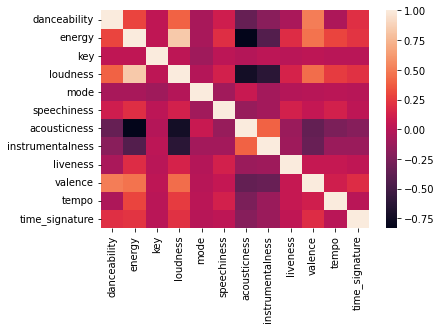

In [263]:
from seaborn import heatmap
heatmap(df.corr())

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating figure
def plot3D(x, y, z):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(x, y, z)

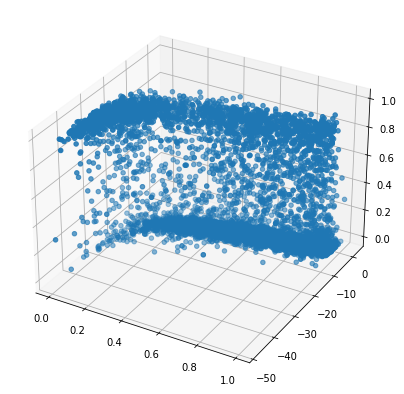

In [105]:
plot3D(df['energy'],df['loudness'],df['instrumentalness'])

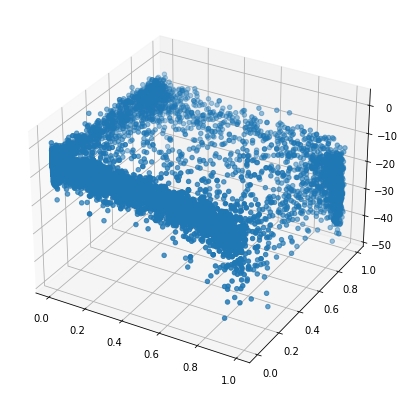

In [100]:
plot3D(df['acousticness'],df['instrumentalness'],df['loudness'])

In [226]:
X_pca1 = df[['energy', 'loudness']]
X_pca2 = df[['acousticness','instrumentalness']]

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X1 = pca.fit_transform(X_pca1)
X2 = pca.fit_transform(X_pca2)
X3 = pca.fit_transform(x_reduced)

In [234]:
x_reduced = pd.DataFrame({
    'x1': X1[:,0],
    'x2': X2[:,0],
    'x3': X3[:,0]
})

In [235]:
df_PCA = df.drop(['energy', 'loudness','acousticness','instrumentalness'], axis=1).join(x_reduced)
df_PCA.head()

,danceability,key,mode,speechiness,liveness,valence,tempo,time_signature,genre,x1,x2,x3
0,0.507,5,1,0.0291,0.170,0.450,134.647,4,acoustic,-3.970031,-0.281153,-3.979136
1,0.496,11,1,0.0336,0.109,0.335,144.092,3,acoustic,-1.102186,0.316924,-1.084903
2,0.760,0,1,0.0352,0.233,0.868,107.602,4,acoustic,0.324430,-0.138078,0.317096
3,0.607,1,1,0.0595,0.111,0.187,111.031,4,acoustic,10.723961,0.804621,10.750820
4,0.497,3,1,0.0704,0.133,0.548,206.431,4,acoustic,6.710043,0.370645,6.720188


<AxesSubplot:>

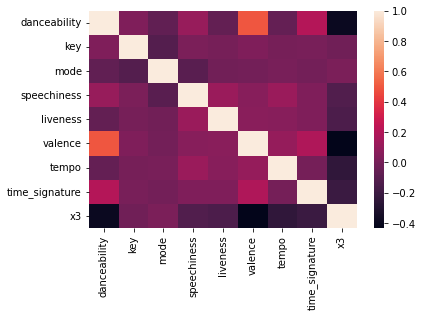

In [236]:
heatmap(df_PCA.drop(['x1','x2'], axis=1).corr())

In [237]:
X_org = df.drop('genre', axis=1)
y_org = df['genre']
x = df_PCA.drop(['genre', 'x1','x2'], axis=1)
y = df_PCA['genre']

In [249]:
x_new = df[['loudness','tempo','key']]
y_new = df['genre']

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
tree_clf = DecisionTreeClassifier(random_state=43)
cross_val_score(tree_clf, x_new, y_new, cv=10)

array([0.23      , 0.235     , 0.24416667, 0.25583333, 0.24166667,
       0.255     , 0.25333333, 0.27833333, 0.25083333, 0.30083333])

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=43, n_estimators=99)
cross_val_score(rf_clf, x_new, y_new, cv=10)

array([0.23916667, 0.26416667, 0.27166667, 0.3       , 0.24916667,
       0.27416667, 0.25916667, 0.3075    , 0.26833333, 0.3225    ])